# RNA folding

The problem below is an implementation of the Zuker Minimization algorithm for solving the RNA folding problem.

## Problem:

Find all optimal secondary structures of the RNA sequence **AAUACUCCGUUGCAGCAU** with the following simplified Zuker minimization algorithm. Starting from the slides’ algorithm, use the following initialisation:
$$j+5>i =⇒ V(i,j)=W(i,j)=∞, i>j,$$

hairpin energy $h(i, j) = 2(i − j + 5)$, and stem energy $s(i, j) = −4, 0, 4$, for Watson-Crick bonds, GU, and all other possible pairs respectively. Ignore multiloops and buldges to simplify V so that it only has the first two cases.

Implement your algorithm in Matlab, R, Python or other convenient system; submit your code. Print the filled-in tables W, V . Draw (by hand) an optimal fold, show its bonds, and the corresponding backtrack path.

## Implementation:

The Zuker minimization algorithm was implemented in order to distinguish the secondary (2D) sructure of an RNA molecule given its sequence. The algorithm utilizes an Energy/Structural matrix with dimensions equal to the length *len* of the RNA sequence, and populates the cells of the matrix recursively from the i = *len* and j = 1, were i: columns and j:rows of the Energy matrix, thus:

$$ W(i,j) = \min \begin{cases} \mbox{W(i-1,j)} \\ \mbox{W(i,j+1)} \\ \mbox{V(i,j)} & \mbox{where (i,j) define a structural element} \\ \mbox{min{W(i,k)+W(k−1,j) : j+1 < k < i}} \end{cases} $$

with $V(i,j)$ an second matrix of dimensions *len* x *len* which captures the energies at each cell. For the simplified version of the Zuker algorithm, the V Energy matrix is implemented as:

$$ V(i,j) = \min \begin{cases} \mbox{s(i,j) + h(i − 1,j + 1)} & \mbox{hairpin} \\ \mbox{s(i,j) + W(i − 1,j + 1)} & \mbox{match} \end{cases} $$

The s(i,j) and h(i,j) matrices are defined as specified in the problem.

The implementation fo the algorithm starts by initializing all matrices that will be used, that is: W, V, s, and h. All are initialized with values 0, and will be populated accordingly, starting with $$j+5>i \Rightarrow V(i,j)=W(i,j)= \infty, i>j,$$ for W and V.

In [1]:
import numpy as np

# given RNA Sequence
seq = "AAUACUCCGUUGCAGCAU"
dim = len(seq)

# Initialization
W = [ [ 0 for i in range(dim) ] for j in range(dim) ] # matrix W
V = [ [ 0 for i in range(dim) ] for j in range(dim) ] # matrix V
hairpin_mat = [ [ 0 for i in range(dim) ] for j in range(dim) ] # matrix h
stem_mat = [ [ 0 for i in range(dim) ] for j in range(dim) ] # matrix s

# Bond energies
stem_en = [-4, 0, 4]
    
for i in range(dim):
    for j in range(dim):
        
        # Populating h
        hairpin_mat[j][i] = 2*(i - j + 5)
        
        # Populating s
        if seq[i]+seq[j] in ["AU", "UA", "GC", "CG"]:
            stem_mat[j][i] = stem_en[0]
            
        elif seq[i]+seq[j] in ["GU", "UG"]:
            stem_mat[j][i] = stem_en[1]
            
        else:
            stem_mat[j][i] = stem_en[2]
            
        # Populating W, V for j+5>i
        if i < j + 5:
            W[j][i] = float('inf')
            V[j][i] = float('inf')

In order to obtain the optimal structure, the algorithmic implementation proceeds with populating the W and V recursively from point i=18 (column) and j=1 (row), in order to obtain the minimal value for the energy at this cell. To this end, two functions are defined, *recurStructure* and *recurEnergy* that populate W and V respectively, and utilize recursion in order to achive this goal.

In [2]:
def recurStructure(j, i):

    if i < j + 5:
        return W[j][i]
    
    else:
        # the 4 conditions/cases for W
        a = recurStructure(j, i-1)
        b = recurStructure(j+1, i)
        c = recurEnergy(j, i)
        d = float('inf')
            
        for k in range(j+2, i):
            d_tmp = recurStructure(k,i) + recurStructure(j, k-1)
            if d_tmp < d:
                d = d_tmp
        
        # choosing the minimum between the 4 cases
        W[j][i] = min(a, b, c, d)
        return W[j][i]
    
    
def recurEnergy(j, i):

    V[j][i] = min(stem_mat[j][i] + hairpin_mat[j+1][i-1], 
                  stem_mat[j][i] + recurStructure(j+1, i-1))  

    return V[j][i]

The obtained W and V matrices are:

In [3]:
recurStructure(0, 17)
print("## ================================ W ================================ ##")
print(np.array(W))
print("\n")
print("## ================================ V ================================ ##")
print(np.array(V))
print("\n")

## ================================ W ================================ ##
[[inf inf inf inf inf 12. 12. 12. 12. 12. 10. 10. 10.  8.  4.  4.  0. -4.]
 [inf inf inf inf inf inf 20. 20. 18. 14. 10. 10. 10.  8.  4.  4.  0. -4.]
 [inf inf inf inf inf inf inf 20. 18. 14. 14. 12. 12.  8.  4.  4.  0.  0.]
 [inf inf inf inf inf inf inf inf 20. 14. 14. 12. 12.  8.  4.  4.  4.  0.]
 [inf inf inf inf inf inf inf inf inf 20. 20. 12. 12.  8.  4.  4.  4.  4.]
 [inf inf inf inf inf inf inf inf inf inf 20. 12. 12.  8.  8.  8.  8.  8.]
 [inf inf inf inf inf inf inf inf inf inf inf 12. 12. 12. 12. 12. 12. 12.]
 [inf inf inf inf inf inf inf inf inf inf inf inf 20. 20. 16. 12. 12. 12.]
 [inf inf inf inf inf inf inf inf inf inf inf inf inf 20. 16. 12. 12. 12.]
 [inf inf inf inf inf inf inf inf inf inf inf inf inf inf 16. 16. 14. 14.]
 [inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf 20. 14. 14.]
 [inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf 20. 18.]
 [inf inf inf inf inf inf 

In order to obtain the secondary structure of the RNA, a backtracking approach is utilized, as below. The code is implemented for this particular sequence, after the following observation was made on the resulting W matrix: **It was noted that for every cell in the matrix, its leftmost and downward values, that is for smaller *i*-s and larger *j*-s, are all equal or larger than the value of the cell. Therefore the conclusion was made that the 4th condition tested when populating W, $min{W(i,k)+W(k−1,j) : j+1 < k < i$, was not utilized in this case, and, subsequently, there are no more than 2 folds for this particular sequence**. Thus, during the backtracking step, testing for this 4th condition was omitted, but it should be noted *that this only applies for this particular sequence*. Of course, in other cases the backtracking approach has to be modified to account for the 4th condition.

In [4]:
backtrack_arr = []

i=17 # 0-index
j=0 # 0-index

while i >= j + 5:

    a = W[j][i-1] # left
    b = W[j+1][i] # down
    c = V[j][i]   # diag

    if W[j][i] == a:
        backtrack_arr.append("left") #updating backtracking array
        j=j; i=i-1 # updating indices

    elif W[j][i] == b:
        backtrack_arr.append("down")
        j=j+1; i=i

    elif W[j][i] == c:

        if c == stem_mat[j][i] + hairpin_mat[j+1][i-1]:
            backtrack_arr.append("hairpin")
            j=j+1; i=i-1

        elif c == stem_mat[j][i] + recurStructure(j+1, i-1):
            backtrack_arr.append("diagonal")
            j=j+1; i=i-1
                
print(backtrack_arr)

['down', 'diagonal', 'diagonal', 'left', 'down', 'diagonal', 'diagonal', 'left', 'hairpin']


By printing the backtracking array, one can obtain the "path" that the algorithm followed to populate the matrix W and reach the optimal energy at i=18 and j=1. The path is the following, sketched on matrix W:

![Problem1_Path.jpg](./Problem1_Path.jpg)

"Translating" the above notation leads to the optimal RNA secondary structure, visualized below. For the visualization step, the [**draw_rna**](https://github.com/DasLab/draw_rna) package was utilized. The necessary script to run the following code are included in the zip file submitted.

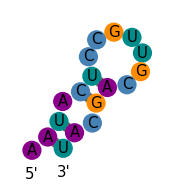

In [6]:
import matplotlib.pyplot as plt
import importlib.util
spec = importlib.util.spec_from_file_location("draw_rna", "./draw_rna/draw.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
import draw_rna.draw as d

# function utilized below, provided by the draw_rna package
def draw_struct(seq, secstruct, c=None, line=False, large_mode=False,
 cmap='viridis', rotation=0, vmin=None, vmax=None, alpha=None, ax=None):
    '''
    Draw sequence with secondary structure.
    Inputs:
    c (string or array-like).  If string, characters must correspond to colors.
     If array-like obj, used as mapping for colormap (provided in cmap), or a string.
    line (bool): draw secstruct as line.
    large_mode: draw outer loop as straight line.
    rotation: rotate molecule (in degrees).
    '''

    if c is not None:
        assert len(c) == len(seq)
        if isinstance(c[0], float):
            d.draw_rna(seq, secstruct, c, line=line, ext_color_file=True, cmap_name = cmap, vmin=vmin, vmax=vmax,
             rotation=rotation, large_mode = large_mode, alpha=alpha, ax=ax)
        else:
            d.draw_rna(seq, secstruct, c,  line=line, cmap_name=cmap, large_mode=large_mode, vmin=vmin, vmax=vmax,
             rotation=rotation, alpha=alpha, ax=ax)

    else:
        d.draw_rna(seq, secstruct, seq2col(seq), line=line, cmap_name = cmap, vmin=vmin, vmax=vmax,
         large_mode = large_mode, rotation=rotation, alpha=alpha, ax=ax)

    if ax is None:
        plt.show()
        

###

# RNA Sequence
seq = "AAUACUCCGUUGCAGCAU"
# Optimal RNA 2D Structure - based on the backtracking array
struct = ".((.((.......)).))"

# choosing colors
col_pal = []
for i in range(len(seq)):
    if seq[i] == "A":
        col_pal.append('darkmagenta')
    elif seq[i] == "U":
        col_pal.append('darkcyan')
    elif seq[i] == "G":
        col_pal.append('darkorange')
    elif seq[i] == "C":
        col_pal.append('steelblue')    
    

# plotting the structure
draw_struct(seq, struct, c=col_pal)